<a href="https://colab.research.google.com/github/BaoTruongThai/ThinkStats2/blob/master/Copy_of_Housing_Price_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/D4E36/final_project/Nhóm 3/housing.csv')
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
np.sort(df['longitude'].unique())
np.sort(df['latitude'].unique())
np.sort(df['housing_median_age'].unique())
np.sort(df['total_rooms'].unique())
np.sort(df['total_bedrooms'].unique())
np.sort(df['households'].unique())
np.sort(df['median_income'].unique())
np.sort(df['median_house_value'].unique())
np.sort(df['ocean_proximity'].unique())

In [ ]:
df[df['total_bedrooms'].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20267,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20268,-119.18,34.19,19.0,2393.0,NaN,1938.0,762.0,1.6953,167400.0,NEAR OCEAN
20372,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN
20460,-118.75,34.29,17.0,5512.0,NaN,2734.0,814.0,6.6073,258100.0,<1H OCEAN


In [ ]:
missing_perc = 100 * df.isnull().sum() / df.shape[0]
missing_perc

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64

In [ ]:
df_imp = df.fillna({'total_bedrooms':df['total_bedrooms'].mean()})
df_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df_imp['total_rooms'] = df_imp['total_rooms'].astype('int')
df_imp['total_bedrooms'] = df_imp['total_bedrooms'].astype('int')
df_imp['population'] = df_imp['population'].astype('int')
df_imp['households'] = df_imp['households'].astype('int')
df_imp['median_income'] = df_imp['median_income']*10000

In [ ]:
df_imp[df_imp.duplicated()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity


**Tasks:**
1. Finding outliers 
2. Caculate correlation between income and house value (as Correlation) 
3. Devide into 5 groups of house ( according to ocean_proximity) 
  --> Compare the Correlation between 5 groups to see the willingness of citizens for housing. Which one has higher willingness --> can consider to invest more in that area 
  May visualize by Power BI ? 
4. Estimate House prices for each group: base on median_house_value + task 2,3 + inflationary



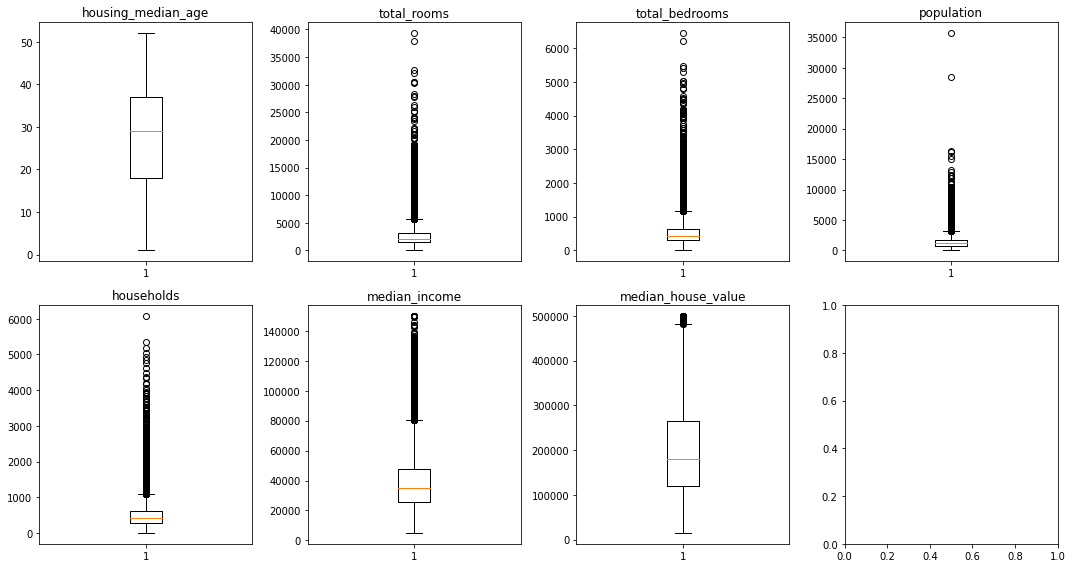

In [ ]:
fig1, axs1 = plt.subplots(2, 4, figsize=(15,8))
axs1[0][0].boxplot(df_imp['housing_median_age'])
axs1[0][0].set_title('housing_median_age')

axs1[0][1].boxplot(df_imp['total_rooms'],)
axs1[0][1].set_title('total_rooms')

axs1[0][2].boxplot(df_imp['total_bedrooms'])
axs1[0][2].set_title('total_bedrooms')

axs1[0][3].boxplot(df_imp['population'])
axs1[0][3].set_title('population')

axs1[1][0].boxplot(df_imp['households'])
axs1[1][0].set_title('households')

axs1[1][1].boxplot(df_imp['median_income'])
axs1[1][1].set_title('median_income')

axs1[1][2].boxplot(df_imp['median_house_value'])
axs1[1][2].set_title('median_house_value')

fig1.tight_layout()

In [ ]:
df_imp = pd.get_dummies(df_imp, dtype = float)   #Convert object to float
df_imp.info()  
df_imp.head(3)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  int64  
 4   total_bedrooms              20640 non-null  int64  
 5   population                  20640 non-null  int64  
 6   households                  20640 non-null  int64  
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_<1H OCEAN   20640 non-null  float64
 10  ocean_proximity_INLAND      20640 non-null  float64
 11  ocean_proximity_ISLAND      20640 non-null  float64
 12  ocean_proximity_NEAR BAY    20640 non-null  float64
 13  ocean_proximity_NEAR OCEAN  206

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880,129,322,126,83252.0,452600.0,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099,1106,2401,1138,83014.0,358500.0,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467,190,496,177,72574.0,352100.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
#remove outliner
from scipy import stats
df_imp1 = df_imp[(np.abs(stats.zscore(df_imp)) < 3).all(axis=1)]
df_imp1 = df_imp1.astype(np.float64)
df_imp1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19741 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19741 non-null  float64
 1   latitude                    19741 non-null  float64
 2   housing_median_age          19741 non-null  float64
 3   total_rooms                 19741 non-null  float64
 4   total_bedrooms              19741 non-null  float64
 5   population                  19741 non-null  float64
 6   households                  19741 non-null  float64
 7   median_income               19741 non-null  float64
 8   median_house_value          19741 non-null  float64
 9   ocean_proximity_<1H OCEAN   19741 non-null  float64
 10  ocean_proximity_INLAND      19741 non-null  float64
 11  ocean_proximity_ISLAND      19741 non-null  float64
 12  ocean_proximity_NEAR BAY    19741 non-null  float64
 13  ocean_proximity_NEAR OCEAN  197

In [ ]:
df_imp1['ocean_proximity_NEAR OCEAN'].value_counts()

0.0    17203
1.0     2538
Name: ocean_proximity_NEAR OCEAN, dtype: int64

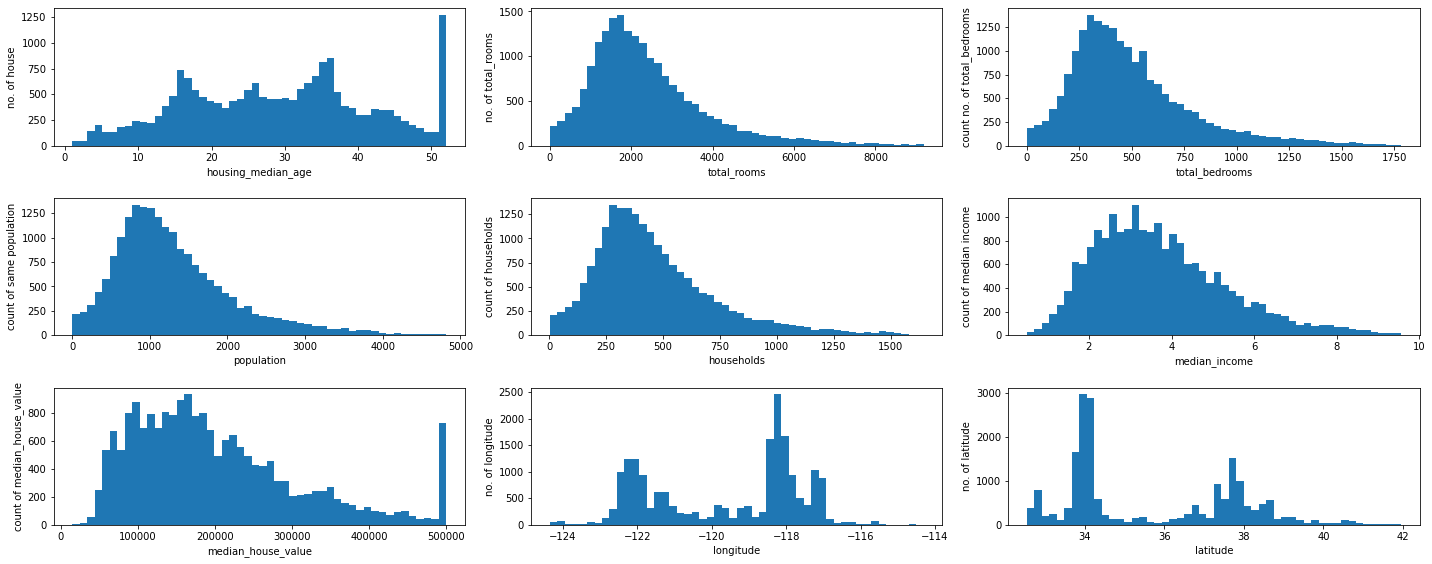

In [ ]:
# df_imp.hist(bins=50, figsize=(20, 15));
fig, axs = plt.subplots(3,3, figsize=(20, 8))

# fig.suptitle('Distribution of variables', verticalalignment='bottom')

axs[0][0].hist(df_imp1['housing_median_age'], bins=50)
axs[0][0].set_xlabel('housing_median_age')
axs[0][0].set_ylabel('no. of house')

axs[0][1].hist(df_imp1['total_rooms'], bins=50)
axs[0][1].set_xlabel('total_rooms')
axs[0][1].set_ylabel('no. of total_rooms')

axs[0][2].hist(df_imp1['total_bedrooms'], bins=50)
axs[0][2].set_xlabel('total_bedrooms')
axs[0][2].set_ylabel('count no. of total_bedrooms')

axs[1][0].hist(df_imp1['population'], bins=50)
axs[1][0].set_xlabel('population')
axs[1][0].set_ylabel('count of same population')

axs[1][1].hist(df_imp1['households'], bins=50)
axs[1][1].set_xlabel('households')
axs[1][1].set_ylabel('count of households')

axs[1][2].hist(df_imp1['median_income'], bins=50)
axs[1][2].set_xlabel('median_income')
axs[1][2].set_ylabel('count of median income')

axs[2][0].hist(df_imp1['median_house_value'], bins=50)
axs[2][0].set_xlabel('median_house_value')
axs[2][0].set_ylabel('count of median_house_value')

axs[2][1].hist(df_imp1['longitude'], bins=50)
axs[2][1].set_xlabel('longitude')
axs[2][1].set_ylabel('no. of longitude')

axs[2][2].hist(df_imp1['latitude'], bins=50)
axs[2][2].set_xlabel('latitude')
axs[2][2].set_ylabel('no. of latitude')

fig.tight_layout()

# axs.plot(df_imp['housing_median_age'])
# axs.hist(df_imp['total_rooms'])
# plt.hist(df_imp['total_rooms'], bins=50)
# plt.show()	
				

Clipping (signal processing) at median_house age and median_house_value
- The number of over 50year-old houses is over 1250 --> need to consider rebuild in the next 20-30 years. The major of housing age is between 10 to 40. 
- The majority of median_incomes falls in the range of 20.000-50.000/year.
- The houses having value from 80.000 to 290.000 are most popular. 
- There is a significant number of high value house from 400.000, especially there are about 1000 houses with the price of 500000

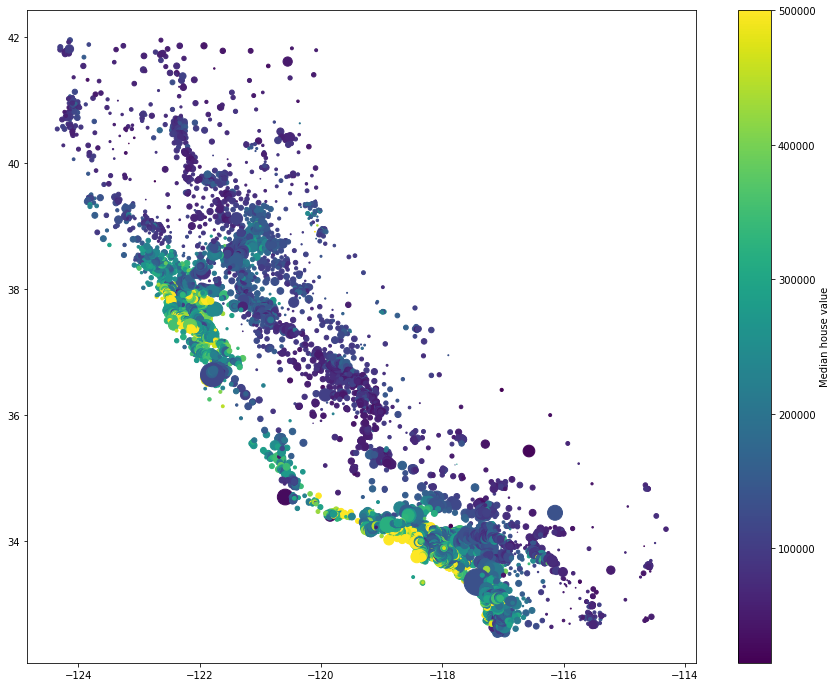

In [ ]:
plt.figure(figsize=(15, 12))
a = plt.scatter(x=df_imp['longitude'], y=df_imp1['latitude'],s=df_imp1["population"]/50, c=df_imp1['median_house_value'],)
fig = plt.colorbar(a)
fig.set_label("Median house value")
plt.show()

This chart shows the distribution of population and median house value on the California state. 
As can be seen from the chart, the bigger dots mean the higher density of population, and to the right is the bar representing the median house value. Interestingly, along the west coast, the density of population and median house price are much higher than inlands, more specifically, at the northwest where San Francisco, San Jose, and Sacramento located as same to the south with Los Angeles streching to San Diego.

In [ ]:
df_imp1.corr().style.background_gradient(cmap="Blues")

/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2813: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/usr/local/lib/python3.7/dist-packages/pandas/io/formats/style.py:2814: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924442,-0.099084,0.008190,0.044765,0.104700,0.035026,-0.015688,-0.046381,0.324210,-0.062979,nan,-0.472564,0.050721
latitude,-0.924442,1.000000,0.001357,-0.009342,-0.055021,-0.127367,-0.066707,-0.082227,-0.145876,-0.449773,0.358311,nan,0.354842,-0.165205
housing_median_age,-0.099084,0.001357,1.000000,-0.348188,-0.286045,-0.262457,-0.264149,-0.140154,0.117156,0.045322,-0.236984,nan,0.259254,0.019293
total_rooms,0.008190,-0.009342,-0.348188,1.000000,0.895715,0.798350,0.891611,0.258966,0.171721,0.002118,0.004705,nan,-0.012307,0.001866
total_bedrooms,0.044765,-0.055021,-0.286045,0.895715,1.000000,0.836651,0.967163,-0.019582,0.075546,0.028400,-0.042917,nan,-0.006032,0.023313
population,0.104700,-0.127367,-0.262457,0.798350,0.836651,1.000000,0.880030,-0.006360,-0.033791,0.114188,-0.061410,nan,-0.068229,-0.019757
households,0.035026,-0.066707,-0.264149,0.891611,0.967163,0.880030,1.000000,0.014692,0.095665,0.058986,-0.081250,nan,0.003463,0.022411
median_income,-0.015688,-0.082227,-0.140154,0.258966,-0.019582,-0.006360,0.014692,1.000000,0.657669,0.183136,-0.243532,nan,0.058056,0.012990
median_house_value,-0.046381,-0.145876,0.117156,0.171721,0.075546,-0.033791,0.095665,0.657669,1.000000,0.260222,-0.488663,nan,0.166453,0.138226
ocean_proximity_<1H OCEAN,0.324210,-0.449773,0.045322,0.002118,0.028400,0.114188,0.058986,0.183136,0.260222,1.000000,-0.608183,nan,-0.314209,-0.341132


* Correlation between Median_income vs Median_house_value is 0.66 point which is a moderately high correlation result. Hence if the income increased, the house value could get higher.

* Correlations between house_median_age and each of other variables including total_rooms, total_bedrooms, population, and households are in range of -0,2 to -0,4 (weak association). The higher housing_median_age, the more likely those variables go towards the opposite direction.

* Similarly, the correlations between variables in pairs, including total_rooms, total_bedrooms, population, and households, are very strong (0,8-1) (the bluest area in corr table).

* citizens living Near Ocean have the highest willingness to spend for housing 
* citizens living in Island have the lowest willingness to spend for housing, they would prefer not to stay if the price increased. 
* citizens living Inland/<1H to ocean/Near Bay have high moderate willingness for spending housing
* Can consider to invest to Near Ocean and Inland/<1H to ocean/Near Bay areas. Investing in Island will bring the lost. 